# [Lenses Data Set](http://archive.ics.uci.edu/ml/datasets/Lenses) #

## Data Set Information:##

The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit. 

Notes: 
+ This database is complete (all possible combinations of attribute-value pairs are represented). 
+ Each instance is complete and correct. 
+ 9 rules cover the training set.


## Attribute Information: ##

3 Classes 
+ 1: the patient should be fitted with hard contact lenses
+ 2: the patient should be fitted with soft contact lenses 
+ 3: the patient should not be fitted with contact lenses 

4 Features
+ age of the patient: (1) young, (2) pre-presbyopic, (3) presbyopic 
+ spectacle prescription: (1) myope, (2) hypermetrope 
+ astigmatic: (1) no, (2) yes 
+ tear production rate: (1) reduced, (2) normal

In [3]:
import pandas as pd
url="http://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
names=["row","age","prescription","astigmatic","tear_prod_rate","class"]
data=pd.read_csv(url,delim_whitespace=True,names=names)
print(data.shape)

(24, 6)


In [4]:
data

,row,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,1,3
1,2,1,1,1,2,2
2,3,1,1,2,1,3
3,4,1,1,2,2,1
4,5,1,2,1,1,3
5,6,1,2,1,2,2
6,7,1,2,2,1,3
7,8,1,2,2,2,1
8,9,2,1,1,1,3
9,10,2,1,1,2,2


In [5]:
# drop row column
# axis 0 for rows and 1 for columns
# inplace=True avoids reassigning of dataframe
data.drop('row',axis=1,inplace=True)


In [6]:
data

,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3
5,1,2,1,2,2
6,1,2,2,1,3
7,1,2,2,2,1
8,2,1,1,1,3
9,2,1,1,2,2


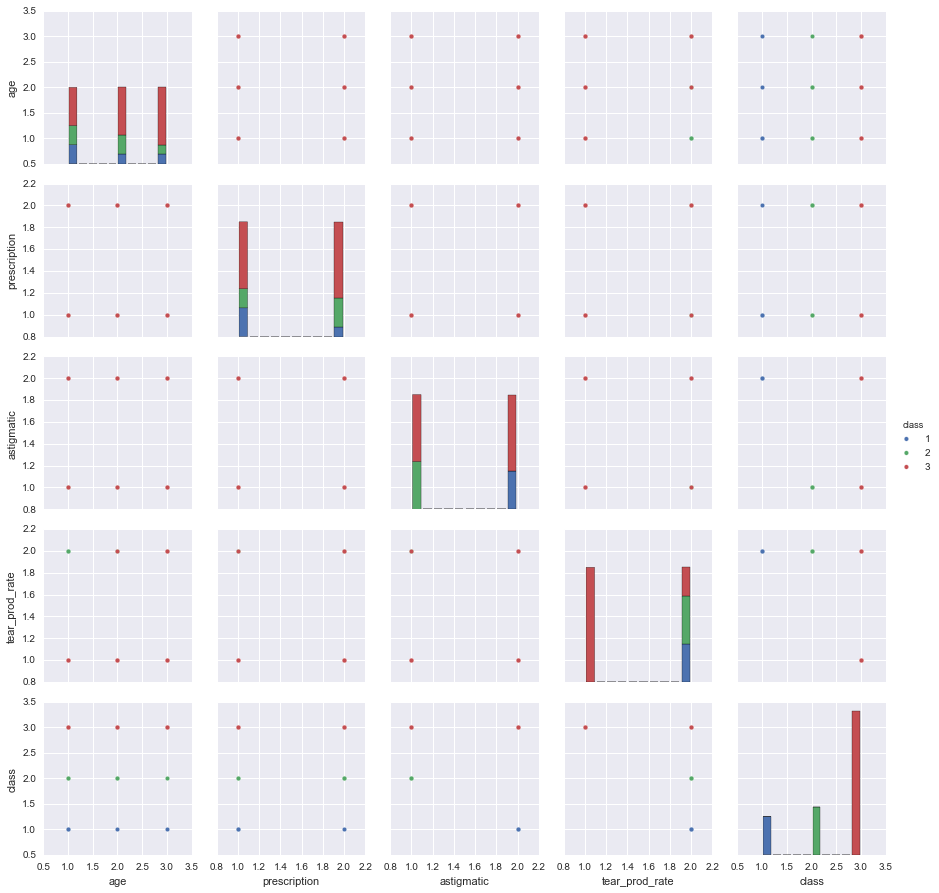

In [8]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,hue="class")

In [9]:
iris_data=sns.load_dataset("iris")

In [10]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


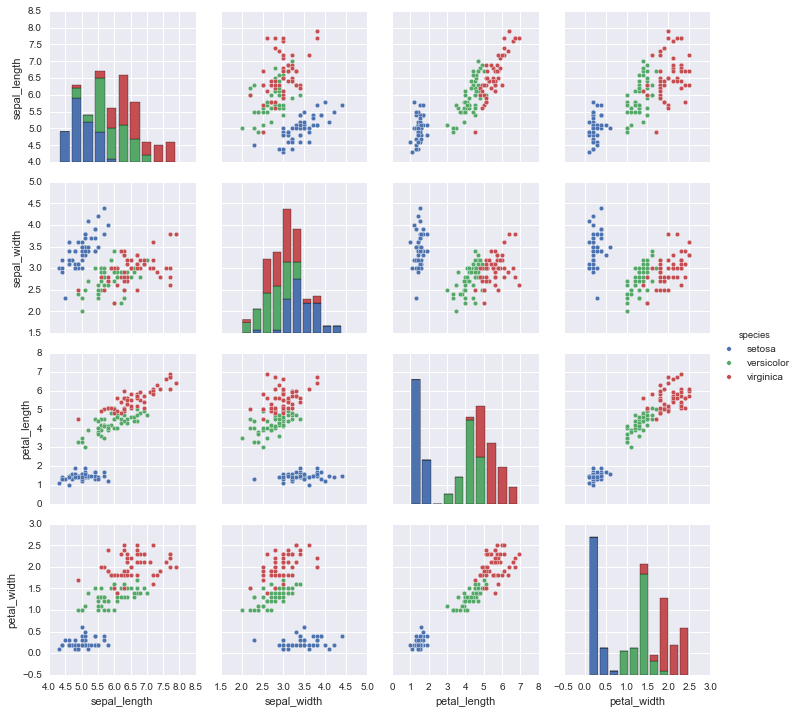

In [12]:
sns.pairplot(iris_data,hue="species")

In [15]:
cat_data=data
cat_data['class'].replace([1,2,3],['hard','soft','no'],inplace=True)

In [16]:
cat_data

,age,prescription,astigmatic,tear_prod_rate,class
0,1,1,1,1,no
1,1,1,1,2,soft
2,1,1,2,1,no
3,1,1,2,2,hard
4,1,2,1,1,no
5,1,2,1,2,soft
6,1,2,2,1,no
7,1,2,2,2,hard
8,2,1,1,1,no
9,2,1,1,2,soft


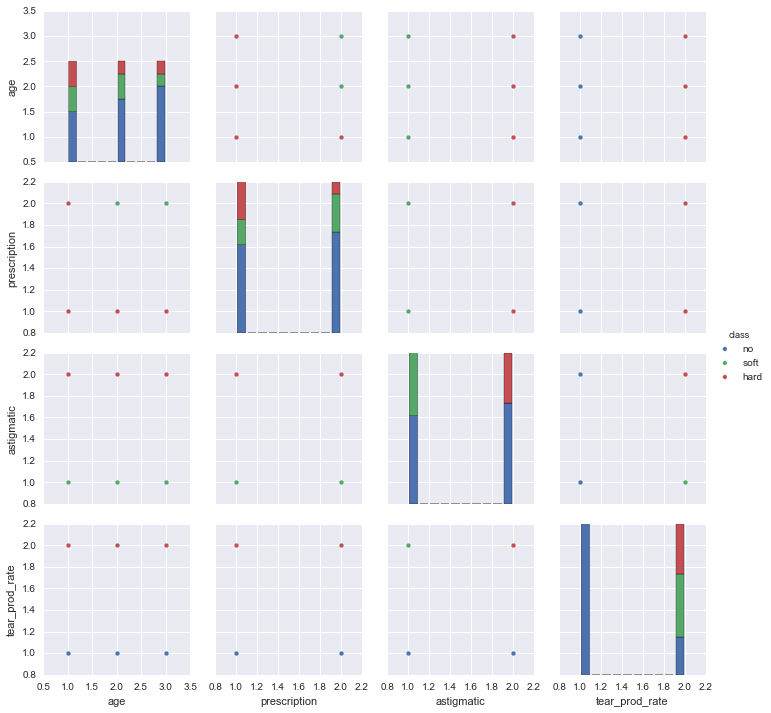

In [17]:
sns.pairplot(cat_data,hue="class")